In [1]:
# this is to demonstrate that the connection is working

from neo4j import GraphDatabase

class HelloWorldExample:

    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def print_greeting(self, message):
        with self.driver.session() as session:
            greeting = session.write_transaction(self._create_and_return_greeting, message)
            print(greeting)

    @staticmethod
    def _create_and_return_greeting(tx, message):
        result = tx.run("CREATE (a:Greeting) "
                        "SET a.message = $message "
                        "RETURN a.message + ', from node ' + id(a)", message=message)
        return result.single()[0]

In [3]:
# this is to demonstrate that the connection is working

if __name__ == "__main__":
    greeter = HelloWorldExample("bolt://localhost:7687", "neo4j", "s3cr3t")
    greeter.print_greeting("hello, world")
    greeter.close()

hello, world, from node 0


Loading the pickle file

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.read_gpickle("E:\\Codes\\Fairness Project\\FairRecommendations\\docker_setup\\db_backup\\networkx_graph_20210307.pickle")

In [22]:
G

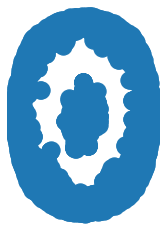

In [6]:

# G = nx.cubical_graph()
plt.subplot(121)

nx.draw(G)   # default spring_layout
# plt.subplot(122)

# nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

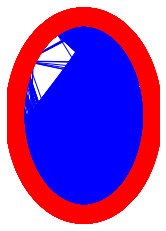

In [6]:
plt.subplot(122)

nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

Generating word embeddings

In [7]:
# pip install node2vec
from node2vec import Node2Vec
# Generate walks
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=100)
# Reformat position nodes

Generating walks (CPU: 1): 100%|██████████| 100/100 [07:23<00:00,  4.44s/it]


In [9]:

# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)

In [15]:
# saving for future use
model.save('saved_model')


model prediction, right now it works only with uuid

In [20]:
# uuid for Erasmo is dbe847ea-871b-4815-9216-d6826bba5681

# ace00e86-9d8c-46ba-80f2-9ed6f20db1b6 refers to "Multimedia and geographic data integration for cultural heritage information retrieval"
# 170ae0e2-dae9-4fb0-98ba-1e89ec10871c refers to "A Multimodal Approach for Cultural Heritage Information Retrieval"
# 531f8cdd-982e-45e0-bc95-f14480218d08 refers to 'Antonio Maria Rinaldi'
# 2b367f4f-d398-4fbb-a78a-1a2050907642 refers to 'University of Naples Federico II'
# 83e37e46-7e33-4c06-b7d9-d9af7891e95b refers to 'Digitale Informations- und Forschungsinfrastrukturen'
# 6d774496-133f-4982-b11e-2c4320ec7923 refers to 'Marco Tomatis'
# acd5858d-3690-46ce-91d1-f8ced9d365c6 refers to 'Vivien Sternkopf'
# 52faa5a3-bd2a-4c64-8b7a-0291ebc92f9d refers to 'Patrick Scholz'
# b342c726-d43d-4c50-8688-23d0d1cab53a refers to 'Jana Althaus'
# 975afa55-78fc-4471-bdfd-51c0cc31442f refers to 'Anirban Saha'

model.wv.most_similar('dbe847ea-871b-4815-9216-d6826bba5681')

[('ace00e86-9d8c-46ba-80f2-9ed6f20db1b6', 0.9938396215438843),
 ('170ae0e2-dae9-4fb0-98ba-1e89ec10871c', 0.9933523535728455),
 ('531f8cdd-982e-45e0-bc95-f14480218d08', 0.9873549938201904),
 ('2b367f4f-d398-4fbb-a78a-1a2050907642', 0.9728524684906006),
 ('83e37e46-7e33-4c06-b7d9-d9af7891e95b', 0.8647711873054504),
 ('6d774496-133f-4982-b11e-2c4320ec7923', 0.8577008843421936),
 ('acd5858d-3690-46ce-91d1-f8ced9d365c6', 0.8560070991516113),
 ('52faa5a3-bd2a-4c64-8b7a-0291ebc92f9d', 0.8535082340240479),
 ('b342c726-d43d-4c50-8688-23d0d1cab53a', 0.8510249853134155),
 ('975afa55-78fc-4471-bdfd-51c0cc31442f', 0.8498332500457764)]